# Combined $\% H_2SO_4$ Table for Density and Molarity





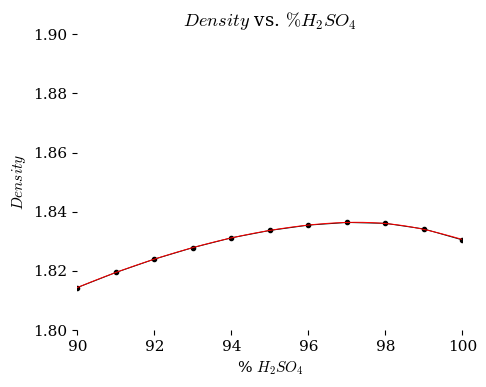

   %H2SO4  Density    g/l  mol/l
0       1   1.0051  10.05  0.103
1       2   1.0118  20.24  0.206
2       3   1.0184  30.55  0.312
3       4   1.0250  41.00  0.418
4       5   1.0317  51.59  0.526
   %H2SO4  Density    g/l  mol/l  ConcAcid
0       1   1.0051  10.05  0.103  0.102478
1       2   1.0118  20.24  0.206  0.206321
2       3   1.0184  30.55  0.312  0.311501
3       4   1.0250  41.00  0.418  0.418026
4       5   1.0317  51.59  0.526  0.525948


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None    # no warning message and no exception is raised

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path

import interpolators   ### import the following functions from local library
# interpolators.MakeInterpolationFunctionForH0inH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction()
# interpolators.MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
# interpolators.MakeInterpolationFunctionForDensityofH2SO4byPercentWt()


############################
### Set global variables 
############################

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000


############################
### Create Figure for Plot
############################

y_label = "$Density$"
x_label = "% $H_2SO_4$"
Title = "$Density$ vs. $\% H_2SO_4$"

style_file_path = github_styles_location
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

plt.style.use(style_file_path+style)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax.set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
       xlim=[90,100],                  
       ylim=[1.8,1.9]
      )                   

############################
### Import All The Data and Plot Each Set
############################

file_name = "03_H2SO4_PercentWt_to_MolarConc.csv"
df = pd.read_csv(data_path + file_name, 
                 skipinitialspace=True, 
                 comment='#') 
df.sort_values(by=['%H2SO4'], inplace=True)

y = df['Density']
x = df['%H2SO4']
ax.plot(x, y, ".-", color = "black", linewidth=0.7, zorder = 1)

interpolation = make_smoothing_spline(x, y, 
                                      w=None, 
                                      lam=0.1)

x1 = np.arange(np.min(x), np.max(x), 0.01)
y1 = interpolation(x1)

ax.plot(x1, y1, "-", color = "red", linewidth=0.7, zorder = 1)
##

fig.savefig("Density.pdf")
plt.show()

print(df.head())


#density = df('Density')
#percent = df('%H2SO4')
volume = 1000

gramsH2SO4 = volume * y * x/100
molesH2SO4 = gramsH2SO4 / molwtH2SO4
df["ConcAcid"] = molesH2SO4
gramsH2O = volume * y * (100-x)/100


print(df.head())


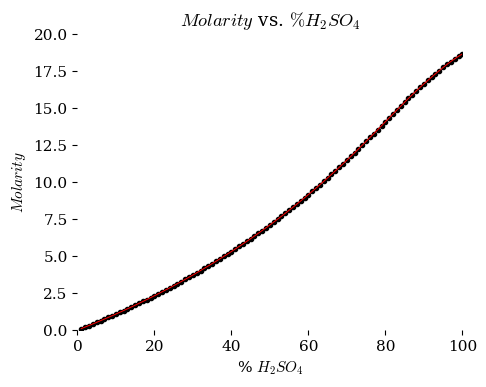

In [27]:
############################
### Create Figure for Plot
############################

y_label = "$Molarity$"
x_label = "% $H_2SO_4$"
Title = "$Molarity$ vs. $\% H_2SO_4$"

style_file_path = github_styles_location
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"

plt.style.use(style_file_path+style)        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

ax.set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
       xlim=[0,100],                  
       ylim=[0,20]
      )                   
####################

y = df['mol/l']
x = df['%H2SO4']
ax.plot(x, y, ".-", color = "black", linewidth=0.7, zorder = 1)


interpolation = make_smoothing_spline(x, y, 
                                      w=None, 
                                      lam=0.1)

x1 = np.arange(np.min(x), np.max(x), 0.01)
y1 = interpolation(x1)

ax.plot(x1, y1, "-", color = "red", linewidth=0.7, zorder = 1)

##

fig.savefig("molarity.pdf")
plt.show()

In [ ]:

###########################
### Plot data as points ###
###########################

ax[0][0].set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

ax[0][0].scatter(x,y, marker = "o", color = "white", edgecolors = "black", linewidths=0.7)

ax[0][0].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray")


ax[0][0].margins(x=.03, y=.03, tight=True)

#####################################
### Plot zoomed in data as points ###
#####################################

ax[0][1].set(title=r"Magnified View",       
       ylabel=y_label,
       xlabel=x_label,
       xlim=zoom_xlim,
       ylim=zoom_ylim
      )

ax[0][1].scatter(x,y, marker = "o", color = "white", edgecolors = "black", linewidths=0.7)

ax[0][1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray")
ax[0][1].margins(x=.03, y=.03, tight=True)

#########################################

#########################################
### Interpolation by straight lines
#########################################

ax[1][0].set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

## Interpolate plot points. We can use a linear interpolation between points or cubic spline

interpolation = interp1d(x, y, kind='linear')

x1 = np.arange(np.min(x), np.max(x), 0.01)
#print(x)
y1 = interpolation(x1)

ax[1][0].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[1][0].plot(x1, y1, "-", color = "black", linewidth=0.7, zorder = 1)



#########################################
### Zoomed in
#########################################

ax[1][1].set(title=r"Magnified View",       
       ylabel=y_label,
       xlabel=x_label,
       xlim=zoom_xlim,                 
       ylim=zoom_ylim
      )                   

## Interpolate plot points. We can use a linear interpolation between points or cubic spline



ax[1][1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[1][1].plot(x1, y1, "-", color = "black", linewidth=0.7, zorder = 1)

ax[1][1].scatter(x,y, marker = "o", color = "white", edgecolors = "black", linewidths=0.7, zorder = 2)


#########################################

#########################################
### Interpolation by cubic splines
#########################################

ax[2][0].set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   

## Interpolate plot points. We can use a linear interpolation between points or cubic spline

interpolation = CubicSpline(x, y)

x1 = np.arange(np.min(x), np.max(x), 0.01)
#print(x)
y1 = interpolation(x1)

ax[2][0].plot(x1, y1, "-", color = "black", linewidth=0.7)

ax[2][0].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)



#########################################
### Interpolation by cubic splines
#########################################

ax[2][1].set(title=r"Magnified View",       
       ylabel=y_label,
       xlabel=x_label,
       xlim=zoom_xlim,                 
       ylim=zoom_ylim
      )                   

## Interpolate plot points. We can use a linear interpolation between points or cubic spline

interpolation = CubicSpline(x, y)

x1 = np.arange(np.min(x), np.max(x), 0.1)
#print(x)
y1 = interpolation(x1)

ax[2][1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[2][1].plot(x1, y1, "-", color = "black", linewidth=0.7, zorder = 1)

ax[2][1].scatter(x,y, marker = "o", color = "white", edgecolors = "black", linewidths=0.7, zorder = 2)








#plt.savefig("fig.pdf")
plt.show()

## Data Smoothing

You can see the awful truth of interpolation. It generates data between every point but, by definition, the line must pass through every point. In noisy data we do not want that. We will use another method now that "averages" the data at every point (for more on that see the link below)

**Note**: the code below includes a data smoothing method to create the line.  The line is not a line fit, it is a smoothed representation of the data. I stole the code from [here](https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615).





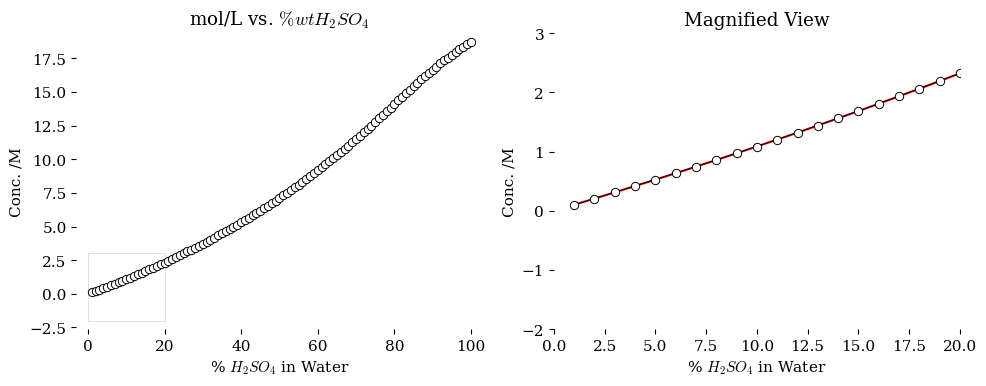

In [ ]:
y1 = df['mol/l']
x1 = df['%H2SO4']

y_label = r"Conc. /M"
x_label = r"% $H_2SO_4$ in Water"

#fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10,4))  

plt.style.use(style_file_path+style)        
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))  

###########################
### Set up rectangles
###########################

#zoom_xlim=[40,70]                  
#zoom_ylim=[6,10]

zoom_xlim=[0,20]                  
zoom_ylim=[-2,3]

vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(zoom_xlim[0], zoom_ylim[0]), 
            (zoom_xlim[0], zoom_ylim[1]), 
            (zoom_xlim[1], zoom_ylim[1]), 
            (zoom_xlim[1], zoom_ylim[0]), 
            (0, 0)]

path = Path(vertices, codes)
pathpatch0 = PathPatch(path, edgecolor='lightgray', facecolor='white', linewidth=0.5, zorder = 0)


ax[0].add_patch(pathpatch0)


###################################
### Data smoothing using LOWESS ###
###################################

# See https://towardsdatascience.com/data-smoothing-for-data-science-visualization-the-goldilocks-trio-part-1-867765050615

lowess_smooth = lowess(y1, x1, frac = .1)

x2 = list(lowess_smooth[:,0])
y2 = list(lowess_smooth[:,1])

#x2 = x2[::5]
#y2 = y2[::5]

#print(x2)
#print(y2)

ax[0].plot(x2, y2, "-", color = "black", linewidth=0.7, zorder = 1)

###########################
### Plot data as points ###
###########################


ax[0].set(title=Title,       
       ylabel=y_label,
       xlabel=x_label,
#       xlim=[2,10],                  
#       ylim=[17,21.5]
      )                   
ax[0].margins(x=.03, y=.03, tight=True)

# ax[1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[0].scatter(x1,y1, marker = "o", color = "white", edgecolors = "black", linewidths=0.7, zorder = 2)
#ax[0].plot(x2, y2, "-", color = "black", linewidth=0.7, zorder = 1)




#########################################
### Zoomed in
#########################################

ax[1].set(title=r"Magnified View",       
       ylabel=y_label,
       xlabel=x_label,
       xlim=zoom_xlim,                 
       ylim=zoom_ylim
      )                   
ax[1].margins(x=.03, y=.03, tight=True)

## Interpolate plot points. We can use a linear interpolation between points or cubic spline



ax[1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[1].plot(x2, y2, "-", color = "black", linewidth=0.7, zorder = 1)

ax[1].scatter(x1,y1, marker = "o", color = "white", edgecolors = "black", linewidths=0.7, zorder = 2)

###############################################################################


#########################################
### Interpolation of Lowess Smoothed Points
#########################################


## Interpolate plot points. We can use a linear interpolation between points or cubic spline

interpolation = interp1d(x1, y1, kind='linear')
interpolation = CubicSpline(x1, y1)
interpolation = scipy.interpolate.make_smoothing_spline(x1, y1, w=None, lam=0.03)
# NO GOOD # interpolation = scipy.interpolate.UnivariateSpline(x1, y1, w=None, bbox=[None, None], k=4, s=None, ext=0, check_finite=False)

x2 = np.arange(np.min(x1), np.max(x1), 0.1)
y2 = interpolation(x2)

#ax[1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)

ax[1].plot(x2, y2, "-", color = "red", linewidth=1.5, zorder = 0)
#ax[1].scatter(x2,y2, marker = "o", color = "white", edgecolors = "red", linewidths=0.7, zorder = 0)




#########################################
plt.savefig("fig.pdf")
plt.show()

In [ ]:
x2[::15]

[0.03]


The acidity increases rapidly as $H_2SO_4$ is added because it is an extremely strong acid. It won't take much to triple the value of $k_{obs}$.

## Rate vs. $H_0$

The $H_0$ of neat acetic acid is 0.2. Every 0.5 log units is about a 3-fold difference in protonating power. So we are shooting for an $H_0$ of -0.3. I checked the data table for the plot above and found an acid mixture that results in an $H_0$ near –0.3.

In [ ]:
display(df)

,%H2SO4,HR
0,6,-0.08
1,8,-0.03
2,10,-0.55
3,12,-0.78
4,14,-1.02
5,16,-1.25
6,18,-1.50
7,20,-1.75
8,22,-2.05
9,24,-2.23


In [1]:
###################################################
### Create Interpolation Function for Density from %H2SO4
###################################################

# The Density of 100% H2SO4 is 1.831


import pandas as pd
import numpy as np
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForDensityofH2SO4byPercentWt():
    Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc.csv"

        
    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    y = df['Density']
    x = df['%H2SO4']
    
    interpolation = make_smoothing_spline(x, y, 
                                          w=None, 
                                          lam=0.1)

    return(interpolation)



###################################################
### call the function to create an interpolator for activity H2O in H2SO4
###################################################

interpolator = MakeInterpolationFunctionForDensityofH2SO4byPercentWt()

###################################################
### An example of using the inerpolation function that you just created
###################################################

percentH2SO4 = 100

H0Value = interpolator(percentH2SO4)

print(f"The Density of {percentH2SO4}% H2SO4 is {H0Value:0.3f}")

The Density of 100% H2SO4 is 1.831
